# Credit Risk Analytics 
# Lecture 6 - Exposure-at-Default (EAD) and Loss-Given-Default (LGD)

## Today you will learn more about the other two components of Expected Loss, EAD and LGD.


The lecture is divided into three parts.

1. What are loans? and what happens in default? Before we can discuss EAD and LGD we need a common understanding of these concepts.

2. EAD

3. LGD




# 1. Introduction: What are loans? What happens in default?

## Bonds versus Loans
- a bond is security that a firm sells. It promises payments of coupon at future points in time. Typically designed to trade close to _par_
- a loan is money lent to a firm or person often by a bank that at any point in time has a principal remaining and an interest rate that determines both the magnitudes and number of future promised payments by the borrower.
- the _coupon rate_ and the _par value_ of a loan are analogous to the _interest rate_ and _principal_ the  on a loan.

## There are many types of loans, but most are a version of:

- Term Loans
- Lines of Credit (sometimes called revolvers)


## 1A: What is a Term Loan?
	
- A term loan is a loan of a fixed amount of money with a fixed payment schedule.  
- A term loan is like a "30-year fixed rate mortgage".
- A business will often sign a 5-year term loan which pays the interest and some of the principal every year (or quarter or month) and then has a balloon payment at the end.
- Purchases of plant and equipment, in contrast, are often funded with term loans.

## 1B: What is a Revolving Line of Credit?

- A bank commits a facility to a borrower and charges a commitment fee and a usage fee
- The borrower can draw down the line as required
- Lines of credit often are used to finance things like inventory and construction projects
- A bank typically has the ability to cut a credit line if they are aware that a borrower is in distress



## 1C: How "workout" works:

- For firms with more a few hundred million or more in revenue, the default is typically resolved through either a renegotiation of payments (_a distressed exchange_) or a Chapter 11 _bankruptcy_. A Chapter 7 bankruptcy is relatively rare.
- For a firm with a few million in revenue or less, the firm will often close up shop and the bank will recover whatever they can.  A formal bankruptcy proceeding may not happen because it is expensive and not necessary.
- In consumer credit, the loan can be _collateralized_ (a car loan or a mortgage) in which case the lender will foreclose on the property
- The bank may have recourse to the borrower in which case the bank may sue the borrower if the collateral doesn't cover the whole loan.


# 2: Exposure-at-Default
EAD is defined as the potential exposure at default if a default were to happen within a given time horizon (eg one year).
EAD is often scaled by the commitment amount (i.e., EAD was 100%).

Most modelers either use (1) date at default or (2) date exactly one year prior to default.

Over the course of a year, both the usage and the commitment amount will change.  Therefore, realized EAD can exceed 100%



## 2A: Utilization vs Exposure-at-Default

Formally, utilization is how much a customer draws on their facilities.  EAD is the amount that is still outstanding on the day of default.

### _Utilization_ is important for many reasons.
- Utilization is maybe one of the most exciting research areas.  Knowing when and how much a customer will borrow makes it easier to forecast potential profits.
- New Basel regulations require treasury teams to know how much liquidity they will need to extend in sudden market freezes.
- Financial teams (FP&A) use utilization models in stress testing exercises such as CECL and CCAR
- While macroeconomic factors are important, default is the most predictive factor in these models.

### _Exposure-at-Default_ is not a utilization model.
- EAD models rarely try to forecast utilization in non-stress situations.
- EAD is required by Basel in all capital calculations.
- Under Basel, unlike utilization, EAD is not allowed to decrease from current levels.
- For example, amortization is ignored.
- EAD is a key input to the credit side of CECL/CCAR conducted by the credit organization.


## 2B: Credit Conversion Factor CCF

The primary tool for calculating EAD is the CCF .


$$\large EAD = exposure_{tr} + CCF *(commitment_{tr} - exposure_{tr})$$

where tr is the reference period.

Exposure is the amount already drawn and commitment is the max amount allowed.  

The CCF can be defined as:

$$\large CCF = \frac{exposure_{td} - exposure_{tr}}{commitment_{tr} - exposure_{tr}} $$

where td is time of default and tr is the reference period.

This concept is sometimes referred to as LEQ or Loan Equivalent.  It is basically thinking about EAD default as the sum of two exposures the current usage and the future usage. 

### 2C: Creating an EAD model
The work horse for EAD is the fractional logistic model.  Surprisingly, this is simply using the logistic model where the dependent variable is either the CCFs or EAD:



$$\large CCF = Logit( x'\beta) $$

$$\large EAD= Logit( x'\beta) $$


We can see some examples from the readings in the next cells.

## Tong et al (2016)
Tong et al tried several different models for a credit card portfolio for a bank in the UK.
Ratings are split into four buckets (1) Aaa-A, (2) BBB-B, (3) C, and (4) unrated.

<img src = "Tong et al.jpg" width="600"/>


Some key takeaways:
- Ratings are an important contributor, with better rated companies having higher CCFs
- There are definite non-linearities involved, as evidenced by the commitments and exposures affecting CCF
- Days of delinquency is interesting because it hints at a lack of controls in UK banks
- Finally, time to default is not useful because it can't be used in a forecast model.


## Moody's Analytics (2014)
Note that Moody's Analytics uses the term LEQ where others use the term CCF and also models usage.

For defaultors:

$Usage = \frac{balance_{td}}{commitment_{td-1}} $

$LEQ = \frac{balance_{td}\; - \; balance_{td-1}}{commitment_{td-1} - balance_{td-1}} $

For non-defaultors:


$Usage = \frac{balance_{td}}{commitment_{td-1}} $

$LEQ = \frac{balance_{t}\; - \; balance_{t-1}}{commitment_{t-1} - balance_{t-1}} $



<img src="Moody's Table 2.jpg" width="700"/><br>





<img src="Moody's Figure 3.jpg" width="600"/>




<img src="Moody's Table 3.jpg" width="700"/>



# 3: Loss-Given Default (LGD)
LGD is formally defined as the amount lost as a percentage of Exposure-at-Default (EAD) if a default were to occur in the next year.
- This is the standard definition for bank risk management.  Other definitions are possible.

## 3A: Key Concepts:
- _Accounting_ versus _economic LGD_
- For economic LGD, how do we determine a _discount rate_?
- How do we treat _collateral_?
- Do we account for that stage of the cycle?

The following chart shows a very typical LGD distribution (from Araten et al (2004)):

<img src="JPM Consumer LGD.jpg" width="500"/>

Key takeaways:
- The largest spike is at 0% accounting LGD (or very small economic LGD).
- The highest LGD is greater than 100%
- There is a smaller peak closer to 100% LGD.

From the same paper, we see another chart showing a well known relationship between PDs and LGDs:

<img src="JPM PD vs LGD.jpg" width="500"/>

Each dot in this chart represents a single year of data.
- Collateral might be worth less during economic downturns
- Companies may have less value during economic downturns, due to poor earnings

## 3B: LGD of Traded Debt
Moody’s and S&P have published recovery rates based on repayment priority.
- recovery equals one minus LGD
- Below uses the market price one day after the default
- Another way to get recoveries is to follow the process until resolution and keep track of all payments made.

Absolute Priority Rule (APR) – creditors receive payment in the order of their priority position

<img src="Moody's naive LGD.png" width="900"/>



## 3C: Accounting versus Economic LGD
<u><i>Accounting LGD</i></u>
- No adjustments are made to the inputs of the calculation.  
- Used specifically for accounting exercises such as stress testing and CECL (current expected credit losses)

<u><i>Economic LGD</i></u>
- All cash flows are discounted back to the default date
- Administrative costs are subtracted
    - Costs for the division managing the process (usually Special Assets Division or SAD)
    - Legal costs
    - Costs to take ownership of the collateral and to sell it
    - Hours spent on paperwork

Example:  a corporate customer defaults but ultimately pays all due amounts after about a year.  The bank assumes a discount rate of 10% and administrative costs of 5%.

    Accounting LGD = 0%

    Economic LGD = 1 – (1 / 1.1) + 0.05 = 14.1%

## 3D: Discount Rates

It can take years to recover money lost.  How do we determine an appropriate discount rate?

- The interest rate on the loans is common
- If not available, one could use an interest rate associated with a risky loan.




## 3E: LGD Drivers - Mortgages
Source:  Qi & Yang (2009)

The equation below provides some insight into typical LGD calculations.  The authors had to make several assumptions while analyzing their data set and often used market proxies.


$\large LGD = \frac{CUPB + ACRINT + FLEXP +PROEXP - NETREC}{CUPB}$


- CUPB is unpaid balance at default
- ACRINT is the interest accrued for 3 months 
- FCLEXP is foreclosure expense (servicing and legal costs incurred from default to foreclosure) and is assumed to be $6000; 
- Property maintenance expenses (PROEXP) is assumed to be 3% of the net recovery
- NETREC = min(NETSALVAGE, 1.5ORIGVAL), where NETSALVAGE and ORIGVAL are the salvage value net of sales costs, repairs, and original property value respectively.
- All cash flows are discounted at the 1-year LIBOR plus 3% from the foreclosure or settlement date to the time of default.14


## 3F: Collateral
When collateral exists, the loan is called secured.  If not, it is called unsecured.

A short and definitely not complete list of collateral types:
- Consumer loans: houses and autos
- Commercial loans:
    - Accounts receivable
    - Inventories
    - Property, plants, and equipment
    - Oil fields (proven and unproven)
    - Other hard and soft commodities
    - Copyrights, film rights, intellectual property
    - Ships, planes, cargo containers, cars

When considering collateral, one must consider several things:
- Current value and value stability
- Liquidity of collateral (or how easy is it to sell at a fair price)
- LTV or Loan-to-Value ratio
- Loan advance rate – the percentage of collateral that a customer can borrow.
- How often and how value is assessed
- Ability to take ownership and sell the collateral
- Whether “recourse” to the borrower exists after the collateral is liquidated

When recourse to the borrower exists, the typical process for recovery post-default is:
- First, take ownership of the collateral and sell it
- If money is still owed, pursue the borrower for that money

<u>Case 1 – ignoring recourse</u>

<center>$\large LGD = EAD - \Sigma\ \alpha_i\ value(collateral_i)$</center><br>

Value can be either discounted or not discounted.  $\alpha_i$ represents a realization value.


<u>Case 2 – unsecured recourse to the borrower</u>

In this case, there is an additional term, aunsecured, because anything not recovered from collateral can be realized from the borrower.

<br>
<center>$\large LGD \times Loan Amount = \bigg(EAD - \Sigma\ \alpha_i\ value(collateral_i)\bigg)(1 - \alpha_{unsecured})$</center><br>


In normal situations, unsecured recoveries can vary from 35% to 45% but it is possible that all of a borrower’s wealth is tied up in the collateral so nothing more can be realized.


## 3G: LGD Modeling Concepts

LGD distributions do not match most simple distributions.
- They are not normally distributed
- They often have peaks at both ends and only sometimes have a peak in the middle.
- Despite that, the most common modeling method is the “fractional logistic model”.
    - Simplistically, this is nothing more than a logistic model where the inputs are between 0 and 1 instead of being exactly 0 and 1.
- Some try to model with a “beta” distribution which has a similar shape.
- When we updated the Moody's Analytics LossCalc model, we used a linear model with a final transform that assured LGD were between 0 and 1.
- Moody’s Investors Service has a waterfall model that assumes a distribution of “enterprise value at default” and then simply cascades the cash flows strictly according to position and collateral.

One thing that leads to a big observation is that many 0% LGDs are ”cures”.
- These could be due to “administrative” defaults where there was an administrative error.
- They could be due to customers being on long vacations.
- Some banks have two models – a “cure model” with a formal LGD model only being used if the cure model signals there will be no cure.
- In a Chapter 11 bankruptcy, often lines of credit do not default as the borrower needs the line to keep the business open and pays it first.


From Qi & Yang (2016):
<img src="lecture6\Qi Yang Table 5.jpg" width="400"/>


Key takeaways:
- The higher is the most recent LTV (CLTV), the higher is LGD (this is the most powerful indicator)
- Stress - being in a recession leads to higher LGD
- Cheaper homes lose more money (LNSZN = home price as a % of local median home prices)


# 3H: Simulation

As a example, we'll simulate a mortgage, assuming:
- a discount rate of 10% 
- admin costs of 3%. 
- no recourse to the owner and 100% recovery on the collateral
- the recovery time between 6 months and 3 years

We will show how loan to value impact LGD, but uncertain time until recovery adds an idiosyncratic component to LGD that cannot be explained by Loan to Value.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_cust = 100
discount = 0.1
admin = 0.03

LTV = np.linspace(0.1, 1.5, num_cust)  # 100 equally spaced observations between 0.1, and 1.5
res_time = np.random.rand(num_cust) * 2.5 + 0.5
res_time2 = pd.DataFrame(res_time)
res_time2.describe()


,0
count,100.000000
mean,1.648786
std,0.712816
min,0.565495
25%,1.016041
50%,1.612313
75%,2.311459
max,2.984007


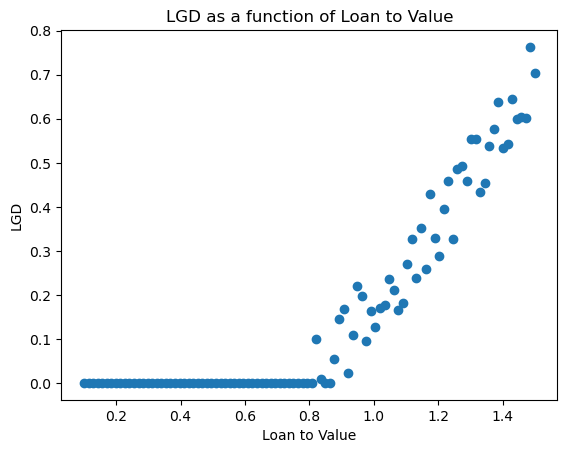

In [3]:

collateral = (1 / (1 + discount)**res_time) - 1 * admin
LGD = [max(0, x - y) for x, y in zip(LTV, collateral)]
#LGD is equal to the greater of 0 and
#LTV - collateral
#so if LTV is 1 LGD is (1-collateral) -- how much less than the loan
#the collateral is worth
#if LTV is 0.5 LGD is 0.5 - collateral so if collateral is worth 50% of 
#its value the LGD is 0 as LTV is 50%
#if LTV is 1.5 LGD is 1.5 - collateral, so if collateral is worth 100% 
#LGD is 50% as the collateral is insufficient to cover the loan.
#if resolution time were 0 and administrative costs were 0 
#Collateral would be 1
#resolution time and adminsitrative costs act as a hair cut to collateral
#value

plt.plot(LTV, LGD, "o")

# Show the plot
plt.xlabel("Loan to Value")
plt.ylabel("LGD")

# Add a title to the plot
plt.title("LGD as a function of Loan to Value")

# Show the plot
plt.show()